In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
%matplotlib widget

# Probability and Data

##### Version 0.1

***

By AA Miller (Northwestern/CIERA)  
08 September 2023

"There is a 40% chance of rain between 2 and 4 pm?"

What does this mean?

*take a minute to discuss this with your partner*

"There is a 40% chance of rain between 2 and 4 pm?"

What does this mean?

$~~~~$Looking at the probability distribution for rain, 40% is the mean outcome

$~~~~$40% is the most likely outcome

$~~~~$Given 1000s of days with identical conditions, 40% of those days have rain

$~~~~$40% indicates the belief of the weather center that it would rain

## Probability

An **experiment** is a real occurance that can be observed.

Experiments have **outcomes**.

all possible outcomes $\equiv$ sample space, $\mathcal{S}$

a single outcome $\equiv$ sample point

subset of $\mathcal{S} \equiv$ event

<img style="display: block; margin-left: auto; margin-right: auto" src="images/sampleSpace.png" alt="sample space" width="650" align="middle">

All measurements have uncertainty$^\dagger$

$^\dagger$Fundamentally this is set by the different uncertainty principles in quantum mechanics, but this is also seen at the macro level (e.g., repeated measurements of the same experiment with a single detector will lead to different outcomes)

A system characteristic is **random** when it is not know with complete certainty.

Randomness can be quantified via **probability**.

## Definitions of Probability

$\mathcal{S} \equiv$ sample space

$A \equiv$ subset of $\mathcal{S}$

$P(A) \equiv$ probability

$~~~~$(i) for all $A$, $P(A) \ge 0$

$~~~~$(ii) if $A$ and $B$ are disjoint (i.e., $A \cap B = \emptyset$);  
$~~~~~~~~~~~~$then $P(A \cup B) = P(A) + P(B)$

$~~~~$(iii) P(S) = 1

From the three axioms of probability:  
$~~~~P(\bar{A}) = 1 - P(A)$  ($\bar{A}$ is the complement of A  
$~~~~P(A \cup \bar{A}) = 1$  
$~~~~0 \le P(A) \le 1$  
$~~~~P(\emptyset) = 0$
$~~~~$if $A \subset B$ then $P(A) \le P(B)$  
$~~~~P(A \cup B) = P(A) + P(B) - P(A \cap B)$

<img style="display: block; margin-left: auto; margin-right: auto" src="images/conditionalProbability.png" width="650" align="middle">

### Conditional Probability

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

<img style="display: block; margin-left: auto; margin-right: auto" src="images/conditionalProbability.png" width="650" align="middle">

If $P(A \cap B) = P(A)P(B) \Rightarrow A \& B$ are independent  
$~~~~ \Rightarrow P(A|B) = P(A)$

Fair 6-sided die as an example: $\mathcal{S} = \{1,2,3,4,5,6\}$  
$~~~~$(i) $P(\mathrm{roll} > 3)$  
$~~~~~~~~~~~~ A = \{4, 5, 6\}$  
$~~~~~~~~~~~~ P(A) = P(4) + P(5) + P(6) = 3 \times 1/6 = 1/2$

$~~~~$(ii) $P(\mathrm{roll} > 3|\mathrm{odd\;number\;rolled)}$  
$~~~~~~~~~~~~ B = \{1, 3, 5\}$  
$~~~~~~~~~~~~ P(B) = 1/2$  
$~~~~~~~~~~~~ P(A \cap B) = P(5) = 1/6$  
$~~~~~~~~~~~~ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/6}{1/2} = 1/3$  

$A \cap B$ is the same as $B \cap A$  
$P(B \cap A) = P(A | B)P(B) = P(B | A)P(A)$

$~~~~~$
$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)}$$

(I generally find it important to emphasize that Bayes' Law *is not wrong* - it is a natural consequence of conditional probability. There are some, within our field and elsewhere, that do not like a Bayesian interpretation of probability. There is a great deal of nuance in arguments about Bayes/subjective statistics and Bryan will touch on this more in the following lecture.)

## Measurements and models

Physics is just a collection of models to understand the Universe.

We obtain outcomes from experiments to learn about the behavior of the Universe. 

These measurements have associated uncertainties, which can be described via probabilty. 

If out sample space $\mathcal{S}$ has events $x_i$ for $i = 1, 2, 3, ..., N$,  
then the probability to observe $x_i = P(x_i) \equiv f_i$, and

$$\sum_{i=1}^\infty f_i = 1$$

For an experiment with single continuous variable $X$ that can take on values $x$,  
what is $P(x)$?

$$P(x) = 0$$

We need to consider probability within a small finite range: $[x, x+dx]$,  
which is known as the **probability density function** (p.d.f.).

$$P([x, x+dx]) = f(x)dx$$

By definition all p.d.f.s are normalized:  
$$\int_\mathcal{S} f(x)dx = 1$$

For known uncertainties we can ask: given some model $\mathcal{M}$, which depends upon model parameters $\theta$, what is the probability of our observation/measurement, $x$?

$$p(x|\mathcal{M}(\theta))$$

In the special, and oft-assumed, case where the probability distribution for $x$ is Gaussian, then: 

$$p(x|\mathcal{M}(\theta)) = \frac{1}{\sqrt{(2\pi\sigma^2)}} \exp\left(- \frac{(x - \mu)^2}{2\sigma^2}\right),$$

where $\theta = (\mu, \sigma^2$) and $\mu$ is the mean and $\sigma^2$ is the variance of the Gaussian.

If individual observations are independent, (i.e., there is no correlation in successive observations) then we can define the likelihood $\mathcal{L}$ of all observations $x_i$ as the product of the individual observation probabilities: 

$$\mathcal{L} \equiv \prod_{i=1}^{N} p(x_i|\mathcal{M}(\theta))$$

Note that $\mathcal{L}$ is not a true p.d.f., it is the product of several probabilities drawn from a p.d.f. $\mathcal{L}$ is not normalized and often is a very small number.

Again, for the special case where each $x_i$ follows a Gaussian p.d.f., then

$$\mathcal{L} = p(x_i|\mathcal{M}(\theta)) = \prod_{i=1}^N \frac{1}{\sqrt{(2\pi\sigma_i^2)}} \exp\left(- \frac{(x_i - \mu)^2}{2\sigma_i^2}\right),$$

where $\sigma_i$ represents heteroskedastic uncertainties on the individual observations $x_i$. 

Because $\mathcal{L}$ is typically very small, numerically the log of the likelihood is more computationally stable:

$$\ln \mathcal{L} =  -\frac{N}{2} \ln\left(\frac{1}{2\pi}\right) - \sum_{i=1}^{N} \ln \sigma_i - \sum_{i=1}^N \left(\frac{(x_i - \mu)^2}{2\sigma_i^2}\right).$$

The first two terms in this equation are constant, meaning: 

$$\ln \mathcal{L} \propto - \sum_{i=1}^N \left(\frac{(x_i - \mu)^2}{2\sigma_i^2}\right).$$


Thus, as we try to determine which model (among many) "best" describes the Universe, the answer is that the best model **maximizes $\mathcal{L}$**.

(maximizing the likelihood and the log of the likelihood is equivalent)

For a collection of outcomes ${x_i}$ (*note* – following an experiment the outcome/data  are fixed and do not change), the likelihood is a function of the model parameters $\theta$.

For any model $\mathcal{M}$, $\mathcal{L}$ is maximized via the choice of $\theta$ that "best" explain the data. 

## Frequentist Interpretation of Models and Probability

There are two fundamental approaches to statistical inference: frequentist and Bayesian statistics. 

Philosophically these approaches differ, but I want to emphasize that neither is wrong. 

As is true for most everything in data science, the particulars of the problem determine which approach is best. 

There are three tenets for frequentist statistics:

$~~~~~~$ Probabilities are relative frequencies of events.

$~~~~~~$ Parameters are fixed, unknown constants. 

$~~~~~~$ Statistial procedures should have well-defined long run frequency properties.

(Bryan is going to discuss Bayesian interpretations in more detail during the next lecture)

## Maximum Likelihood Estimation

For simple $\mathcal{M}$ one can differentiate the likelihood and determine its maximum analytically (but $\mathcal{M}$ is rarely this simple). 

Numerical methods can be used as an alternative to analytic solutions.

Maximizing the likelihood is equivalent to minimizing the negative log likelihood. 

The [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html?highlight=minimize) function inside the `scipy.optimize` module provides a "standard" for determining the maximum likelihood.

(the best way to minimize a function is by taking derivatives, but sometimes that is not possible. There are multiple numerical methods to address this, many of them options for the `minimize` function. The [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) algorithm is the default.)

A caveat about numerical MLE methods: there are no guarantees of convergence to a *global* minimum. 

There is always a risk that the algorithm only found a local minimum.

One nice aspect of the Gaussian likelihood, is that we can recast $\ln \mathcal{L}$ in terms of the $z$-score, $z_i = (x_i - \mu)/\sigma_i$: 

$$\ln \mathcal{L} = \mathrm{constant} - \frac{1}{2} \sum z_i^2$$

This sum is often referred to as the "$\chi^2$" ($\chi^2 = \sum z_i^2$). 

(if you have ever heard that the "best" model minimizes the $\chi^2$, this is where it comes from: maximizing a Gaussian likelihood)

This means the distribution of $\ln \mathcal{L}$ can be determined from the $\chi^2$ distribution with $N - k$ degrees of freedom, where $k$ is the number of model parameters. 

(briefly, the sum of the squares of the $z$-score, $Q = \sum z_i^2$, follows a $\chi^2$ distribution with $k = N$ degrees of freedom, 

$$p(Q|k) \equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2 -1} \exp(-Q/2),$$

where $Q$ must be greater than zero and $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function).)

Comparing the $\chi^2$ score to a $\chi^2$ distribution with $N - k$ degrees of freedom provides a numerical measure of the "goodness" the model.

In the frequentist interpretation of probability MLE is used to determine optimal estimates of the model parameters $\theta$. 

(you will now use `scipy` to determine optimal model parameters $\theta$)

## Problem 0) Helper Functions

We will need to make lots of plots of data and models throughout this notebook.

**Problem 0a**

Write a function `data_plot()` that creates and returns `matplotlib` figure and axes instances using [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

The function should label the abcissa `x` and the ordinate `y`, and take optional arguments `x_obs`, `y_obs`, `y_obs_unc` that are plotted when provided by the user. 

In [3]:
def data_plot(x_obs=[], y_obs=[], y_obs_unc=[]):
    
    fig, ax = plt.subplots(figsize=(10,5.5))
    
    if len(x_obs) > 0 and len(y_obs) > 0:
        if len(y_obs_unc) > 0:
            ax.errorbar(x_obs, y_obs, y_obs_unc, 
                        fmt='o', mec='RebeccaPurple', mfc='white', 
                        ecolor='RebeccaPurple')
        else:
            ax.errorbar(x_obs, y_obs, 
                        fmt='o', mec='RebeccaPurple', mfc='white')
    
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.tick_params('both', labelsize=13)
    return fig, ax

**Problem 0b**

Using `np.random` simulate 15 observations that are drawn from a linear relation defined by $f(x) = 3.14\,x + 6.626$. The observations should be collected over the range [0,10]. 

Assume that the observations are noisy, and the scatter is described by a Gaussian with variance = 9. 

In [4]:
n_obs = 15
rng = np.random.default_rng(seed=2009)

x_obs = rng.uniform(0, 10, n_obs)
y_obs = rng.normal(3.14*x_obs + 6.626, 3)
y_obs_unc = np.ones_like(y_obs)*3

**Problem 0c**

Confirm your results from the previous two problems by using `data_plot()` to display the observations generated in **0b**.

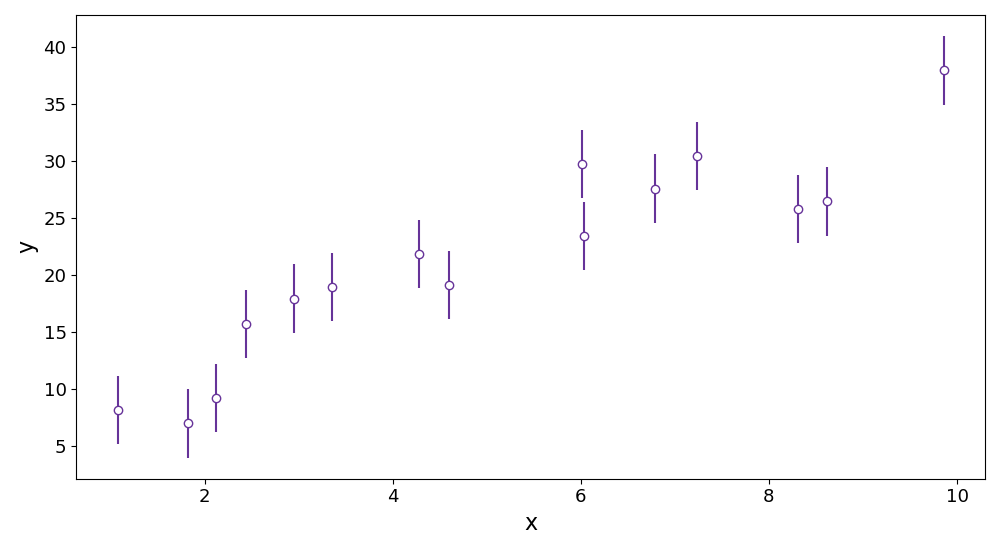

In [5]:
fig, ax = data_plot(x_obs, y_obs, y_obs_unc)
fig.tight_layout()

## Problem 1) The likelihood

We just showed that the likelihood is related to the observations conditioned on the model:

$$\mathcal{L} \equiv \prod p(x_i|\mathcal{M}(\theta))$$

Our aim is to identify model parameters $\theta$ that *maximize* the likelihood. 

**Probelm 1a**

Write a function `model` with two input parameters, `theta` and `x`, where `theta` is a tuple with values $\theta_0$ and $\theta_1$, and the function returns $\theta_0 + \theta_1 x$.

*Hint* – this is far more formal than necessary, but it will simplify other problems later in the notebook. 

In [6]:
def model(theta, x):
    '''
    Return dependent variable values for f(x) = theta_0 + theta_1 x
    
    Parameters
    ----------
    theta : tuple (size=2)
        theta[0] is the intercept and theta[1] is the slope of the line
    
    x : array-like
        values of the independent variable where f(x) should be evaluated
    '''
    
    b, m = theta
    return m*x + b

**Problem 1b**

Write a function `prob` that calculates and returns the probability of observations `x` assuming that $p(x)$ follows a normal distribution with mean `mu` and standard deviation `sigma`. 

In [7]:
def prob(x, mu, sigma):
    p = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x - mu)**2/(2*sigma**2))
    return p

**Problem 1c**

Calculate the likelihood for the observations that were simulated in **0b**. Use the model parameters that generated the data. 

*Hint* – think carefully about your variable names. 

In [8]:
lkhd = np.prod(prob(y_obs, model((6.626, 3.14), x_obs), y_obs_unc))

print(f'The likelihood for this data set is {lkhd}')

The likelihood for this data set is 2.03322667294441e-18


That is a very small number! 

**Problem 1d**

Using the same model parameters as before, generate data sets of 100, 200, and 300 observations, and calculate the likelihood for each.

*Hint* – do not use the same variable names (e.g., `x_obs`, `y_obs`, etc) that we used before; we do not want to over-write those variables.

In [9]:
for n_obs in [100, 200, 300]:

    rng = np.random.default_rng(seed=2009)

    x_sim = rng.uniform(0, 10, n_obs)
    y_sim = rng.normal(3.14*x_sim + 6.626, 3)
    y_sim_unc = np.ones_like(x_sim)*3

    lkhd = np.prod(prob(y_sim, model((6.626, 3.14), x_sim), y_sim_unc))

    print(f'The likelihood for {n_obs} observations is {lkhd}')

The likelihood for 100 observations is 7.769122769272204e-114
The likelihood for 200 observations is 5.154240581981437e-218
The likelihood for 300 observations is 0.0


300 observations is a small number! Gaia has observed more than 1 billion stars, and yet, with only 300 observations in an outrageously simple dataset, the likelihood is so small it is equivalent to 0 at machine precision. 


This is why it is always a good idea to work with the log of the likelihood, not only does this turn a product into a sum, more importantly, the calculations become far more stable on your machine. 

**Problem 1e**

Write a function `lnl` that calculates the log likelihood for some observations, their uncertainties, and the model to which the observations are being compared. Assume that the likelihood is Gaussian.

*Hint* – the `model` function that was created earlier should be inside the `lnl` function, this means that `theta` should be the first arguement for the `lnl` function.

*Note* – likelihoods are calculated for comparison purposes, their absolute value does not have much meaning, so you can ignore constant terms for this function. 

In [10]:
def lnl(theta, y_obs, y_obs_unc, x_obs):
    y_model = model(theta, x_obs)
    return -1/2*np.sum((y_obs-y_model)**2/y_obs_unc**2)

**Problem 1f**

Using the same model parameters as before, generate data sets of 100, 200, and 300 observations, and calculate the *log likelihood* for each.

In [11]:
for n_obs in [100, 200, 300]:

    rng = np.random.default_rng(seed=2009)

    x_sim = rng.uniform(0, 10, n_obs)
    y_sim = rng.normal(3.14*x_sim + 6.626, 3)
    y_sim_unc = np.ones_like(x_sim)*3

    lnlike = lnl((6.626, 3.14), y_sim, y_sim_unc, x_sim)

    print(f'The ln likelihood for {n_obs} observations is {lnlike}')

The ln likelihood for 100 observations is -58.68946115574464
The ln likelihood for 200 observations is -96.81356610831219
The ln likelihood for 300 observations is -148.61949734946114


## Problem 2) Maximizing the Likelihood

It is all well and good to calculate the likelihood, but what we truly want is to maximize the likelihood. 

Most algorithms are designed to minimize, rather than optimize, a function. Fortunately, minimizing the negative log likelihood is the exact same as maximizing the log likelihood.

**Problem 2a**

Write a function `nll` to calculate the negative log likelihood. 

*Hint* – this is really simple, don't overthink it.

In [12]:
def nll(theta, y_obs, y_obs_unc, x_obs):
    return -1*lnl(theta, y_obs, y_obs_unc, x_obs)

**Problem 2b**

Using `minimize` from `scipy.optimize` determine the maximum likelihood estimation for the intercept and slope of the line that was used to generate the synthetic observations. 

*Hint* – for arguments `minimize` needs (1) a function, (2) an initial guess for the model parameters, which is why we've been using a tuple `theta`, and (3) a tuple containing the remaining arguments for the function to be minimized (i.e., the data/observations).

In [13]:
res = minimize(nll, (0,0), (y_obs, y_obs_unc, x_obs))

print(f'b = {res.x[0]:.4f} and m = {res.x[1]:.4f} for the MLE')

b = 6.3661 and m = 2.9662 for the MLE


**Problem 2c**

Overplot the line determined by the MLE on top of the synthetic data. 

How does the line compare to the true line used to generate the data?

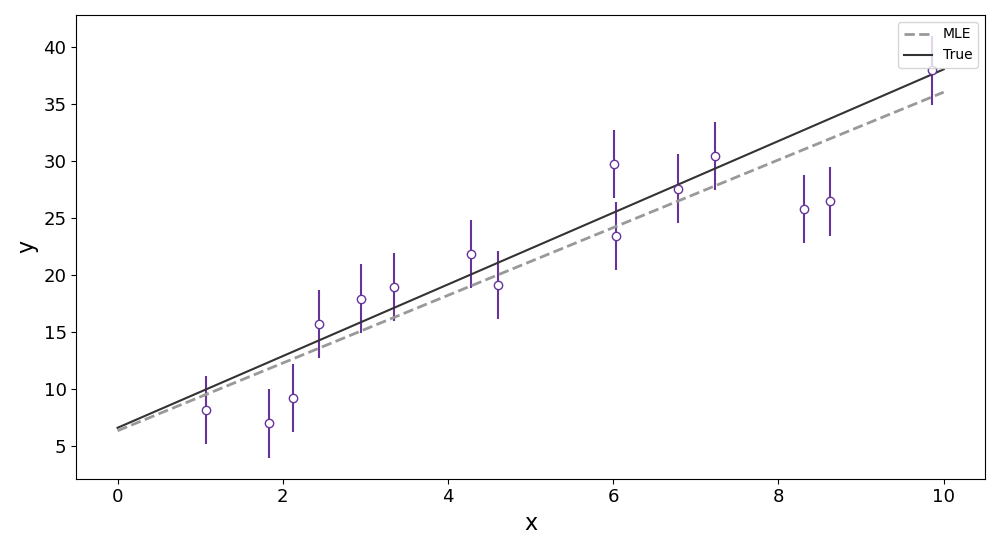

In [14]:
fig, ax = data_plot(x_obs, y_obs, y_obs_unc)
ax.plot([0, 10], model(res.x, np.array([0,10])), 
        '--', color='0.6', label='MLE', lw=2)
ax.plot([0,10], [6.626, 6.626 + 31.4], '0.2', label='True')
ax.legend()
fig.tight_layout()